In [8]:
# from utility_functions import hw2q1 as generate_data
import hw2q2
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

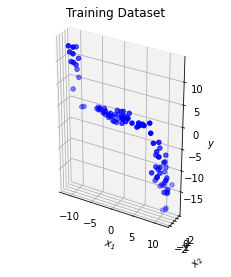

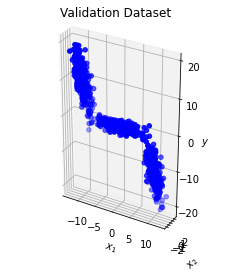

In [10]:
xTrain, yTrain, xValidate, yValidate = hw2q2.hw2q2()

In [3]:
#w_map = np.dot(np.linalg.inv(np.sum(Z,axis=2)+(0.01/pow(gamma,2)*np.identity(4))),   np.sum((repmat(y.T,4,1) * z),axis=1)).reshape((4,1))

def mle(phi, t):
    # get pseudo-inverse
    tphi = np.transpose(phi)
    results = np.matmul(np.linalg.inv(np.matmul(tphi,phi)),tphi)
    # multiply by y
    results = np.matmul(results, t)
    return results

def mean_squared_error(w, x_test, y_test):
    N = len(y_test)
    x = []
    for i in range(0,N,1):
        row = [1, x_test[0][i], x_test[1][i], x_test[0][i]**2, 
                x_test[1][i]**2, x_test[0][i]**3, x_test[1][i]**3]
        x.append(row)
    total_error = 0
    for n in range(0,N,1):
        error = (y_test[n]-np.dot((w),x[n]))**2
        total_error = total_error + error
    total_error = total_error/N
    return total_error[0,0]

def map(phi, gamma, t):
    # get pseudo-inverse
    tphi = np.transpose(phi)
    results = np.matmul(np.linalg.inv(np.add(gamma*np.identity(phi.shape[1]), np.matmul(tphi,phi))),tphi)
    # multiply by y
    results = np.matmul(results, t)
    return results

In [5]:
# train has 100 samples, validate has 1000 samples
x_train, y_train, x_test, y_test = hw2q2.generateData()
N = 100
phi = []
fig, axes = plt.subplots(2,2, sharex=False, sharey=True)
for i in range(0,100,1):
    row = [1, x_train[0][i], x_train[1][i], x_train[0][i]**2, 
            x_train[1][i]**2, x_train[0][i]**3, x_train[1][i]**3]
    phi.append(row)
phi = np.matrix(phi)

# Plot training data
for i in range(0,1000,1):
    axes[0,0].plot(x_test[0][i], y_test[i], color='skyblue', marker='.', alpha=0.4)
    axes[0,1].plot(x_test[1][i], y_test[i], color='palegreen', marker='.', alpha=0.4)
    axes[1,0].plot(x_test[0][i], y_test[i], color='lightcoral', marker = '.', alpha=0.4)
    axes[1,1].plot(x_test[1][i], y_test[i], color='orange', marker='.', alpha=0.4)
min_x_0 = min(x_test[0])
max_x_0 = max(x_test[0])
min_x_1 = min(x_test[1])
max_x_1 = max(x_test[1])

# MLE
mle_w = mle(phi, y_train)
error = mean_squared_error(mle_w, x_test, y_test)
print(error)
# Add lines to plots
x_0 = np.linspace(min_x_0, max_x_0, num=1000)
x_1 = np.linspace(min_x_1, max_x_1, num=1000)
w = np.transpose(mle_w)[:,0]
fx = []
for i in range(len(x_0)):
    x = x_0[i]
    # w: 0,1,3,5
    fx.append(w[0]+w[1]*x+w[3]*x**2+w[5]*x**3)
fx = np.squeeze(fx)
axes[0,0].plot(x_0,fx)
fx = []
for i in range(len(x_1)):
    x = x_1[i]
    # w: 0,1,3,5
    fx.append(w[0]+w[2]*x+w[4]*x**2+w[6]*x**3)
fx = np.squeeze(fx)
axes[0,1].plot(x_1,fx)


# MAP
gammas = [i for i in np.logspace(-4,4,9)]
for gamma in gammas:
    print(gamma)
    map_w = map(phi, gamma, y_train)
    error = mean_squared_error(map_w, x_test, y_test)
    print(error)
    w = np.transpose(map_w)[:,0]
    fx = []
    for i in range(len(x_0)):
        x = x_0[i]
        # w: 0,1,3,5
        fx.append(w[0]+w[1]*x+w[3]*x**2+w[5]*x**3)
    fx = np.squeeze(fx)
    axes[1,0].plot(x_0,fx)
    fx = []
    for i in range(len(x_1)):
        x = x_1[i]
        # w: 0,1,3,5
        fx.append(w[0]+w[2]*x+w[4]*x**2+w[6]*x**3)
    fx = np.squeeze(fx)
    axes[1,1].plot(x_1,fx)
axes[0,0].set_ylabel('MLE')
axes[1,0].set_ylabel('MAP')
axes[1,0].set_xlabel('Validate, (x_1,y)')
axes[1,1].set_xlabel('Validate, (x_2,y)')
plt.tight_layout()
plt.savefig('./question_1.pdf')


NameError: name 'hw2q2' is not defined